In [36]:
import numpy as np
from wave import open as open_wave
import pandas as pd
%pylab inline
from  IPython.display import Audio


Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("E:/Projects/gender-recognition-by-voice/gender-recognation/data/csv/waves.csv")

In [3]:
def normalize(ys, amp=1.0):
    """Normalizes a wave array so the maximum amplitude is +amp or -amp.
    ys: wave array
    amp: max amplitude (pos or neg) in result
    returns: wave array
    """
    high, low = abs(max(ys)), abs(min(ys))
    return amp * ys / max(high, low)

In [144]:
class Wave:
    def __init__(self):
        self._framerate = None
        self.ys = None
    
    def read_wave(self,filename):
        """Reads a wave file.
        filename: string
        returns: Wave
        """
        fp = open_wave(filename, 'r')

        nframes = fp.getnframes()
        sampwidth = np.int16
        self.framerate = fp.getframerate()

        z_str = fp.readframes(nframes)

        fp.close()
        self.ys = np.fromstring(z_str, dtype=sampwidth)

        self.ys = normalize(self.ys)
        return self.ys
    
    def make_spectrum(self):
        """
        Computes the spectrum using FFT.
        hs: array of amplitudes (real or complex)
        fs: array of frequencies
        framerate: frames per second
        full: boolean to indicate full or real FFT
        """
        n = len(self.ys)
        d = 1 / self.framerate


        self.hs = np.fft.rfft(self.ys)
        self.fs = np.fft.rfftfreq(n, d)

        return (self.hs, self.fs, self.framerate)
    
    def low_pass_filter(self, cutoff, factor=0):
        """Attenuate frequencies above the cutoff.
        cutoff: frequency in Hz
        factor: what to multiply the magnitude by
        """
        self.hs[abs(self.fs) > cutoff] *= factor
    def low_pass_spectrum(self,cutoff):
        self.make_spectrum()
        self.low_pass_filter(cutoff)
        return (self.hs, self.fs, self.framerate)
      
    @property
    def framerate(self): return self._framerate
    
    @framerate.setter
    def framerate(self, value):
        self._framerate = value
        


In [145]:
for x in df.path.iloc[:3].values:print(x)

E:\Projects\gender-recognition-by-voice\gender-recognation\data\raw\1028-20100710-hne.tgz\1028-20100710-hne\wav\ar-01.wav
E:\Projects\gender-recognition-by-voice\gender-recognation\data\raw\1028-20100710-hne.tgz\1028-20100710-hne\wav\ar-02.wav
E:\Projects\gender-recognition-by-voice\gender-recognation\data\raw\1028-20100710-hne.tgz\1028-20100710-hne\wav\ar-03.wav


86000


c:\users\hadi\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


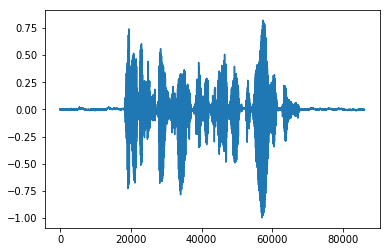

In [146]:
def plot_player(i):
    p = df.path.iloc[i]
    wave = Wave()
    snd = wave.read_wave(p)
    plot(snd)
    print(len(snd))
    audio = Audio(data=snd, rate=wave.framerate)
    return audio

plot_player(1)

66000


c:\users\hadi\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


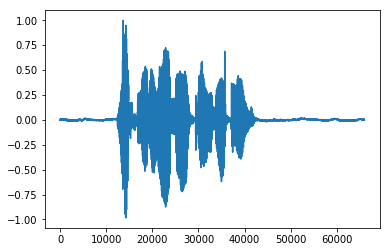

In [147]:
plot_player(9)

In [148]:
p = df.path.iloc[0]
wave = Wave()
snd = wave.read_wave(p)
wave.low_pass_spectrum(280)


c:\users\hadi\anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


(array([-5.9285398  +0.j        ,  1.11467678 -5.03990767j,
        19.52419717-31.28123037j, ...,  0.         -0.j        ,
        -0.         +0.j        , -0.         +0.j        ]),
 array([0.00000e+00, 1.60000e-01, 3.20000e-01, ..., 7.99968e+03,
        7.99984e+03, 8.00000e+03]),
 16000)

In [149]:
am, freq, framerate = wave.low_pass_spectrum(280)

In [150]:
am

array([-5.9285398  +0.j        ,  1.11467678 -5.03990767j,
       19.52419717-31.28123037j, ...,  0.         -0.j        ,
       -0.         +0.j        , -0.         +0.j        ])

Text(0.5,1,'fft')

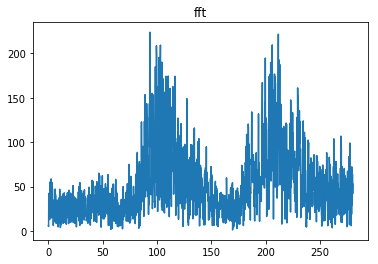

In [151]:
idx = np.argsort(freq[freq <= 280])

plt.figure()
plt.plot(freq[idx], np.abs(am[idx]))
plt.title('fft')

In [152]:
freq

array([0.00000e+00, 1.60000e-01, 3.20000e-01, ..., 7.99968e+03,
       7.99984e+03, 8.00000e+03])